In [1]:
import numpy as np
import pandas as pd
from divination import Divination

In [2]:
dates = [np.datetime64('2020-01-01') + np.timedelta64(idx, 'D') for idx in range(1024)]
sin = np.sin(np.linspace(0, 16 * 2 * np.pi, len(dates)))
cos = np.cos(np.linspace(0, 16 * 2 * np.pi, len(dates)))
combined = sin + cos

In [3]:
data = pd.DataFrame.from_dict({
    'date': dates,
    'sin': sin,
    'cos': cos,
    'combined': combined
}).set_index('date')
data

,sin,cos,combined
date,,,
2020-01-01,0.000000e+00,1.000000,1.000000
2020-01-02,9.811265e-02,0.995175,1.093288
2020-01-03,1.952786e-01,0.980748,1.176026
2020-01-04,2.905602e-01,0.956857,1.247417
2020-01-05,3.830381e-01,0.923733,1.306771
...,...,...,...
2022-10-16,-3.830381e-01,0.923733,0.540695
2022-10-17,-2.905602e-01,0.956857,0.666297
2022-10-18,-1.952786e-01,0.980748,0.785469


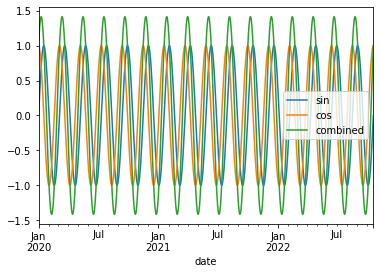

In [4]:
data.plot()

In [6]:
predictions = Divination(periods=8).fit(data).predict(data, num_steps=256)
predictions

,sin,cos,combined
date,,,
2020-01-01,0.000000,1.000000,1.000000
2020-01-02,0.098113,0.995175,1.093288
2020-01-03,0.195279,0.980748,1.176026
2020-01-04,0.290560,0.956857,1.247417
2020-01-05,0.383038,0.923733,1.306771
...,...,...,...
2023-06-29,-0.872182,0.704461,-0.293326
2023-06-30,-0.662523,0.907878,0.129796
2023-07-01,-0.445877,1.104744,0.554860


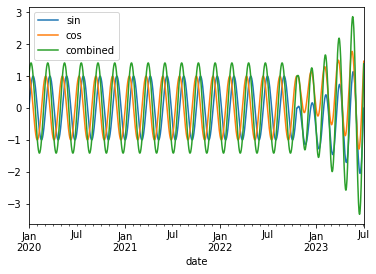

In [7]:
predictions.plot()